<a href="https://colab.research.google.com/github/Gerosh-George/Face-Mask-Detetction-Webapp/blob/master/Image_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the necessary packages
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
PATH="/content/drive/My Drive/Face Mask Detection Model"
face_detector_path=os.path.join(PATH,'Face Detector')
mask_model=os.path.join(PATH,'model1')
print(face_detector_path)
print(mask_model)


/content/drive/My Drive/Face Mask Detection Model/Face Detector
/content/drive/My Drive/Face Mask Detection Model/model1


In [ ]:
# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = os.path.join(face_detector_path, "deploy.prototxt")
weightsPath = os.path.join(face_detector_path,
	"res10_300x300_ssd_iter_140000.caffemodel")
net = cv2.dnn.readNet(prototxtPath, weightsPath)
# load the face mask detector model from disk
print("[INFO] loading face mask detector model...")
model = load_model(mask_model)

[INFO] loading face detector model...
[INFO] loading face mask detector model...


[INFO] computing face detections...
[INFO] Result:


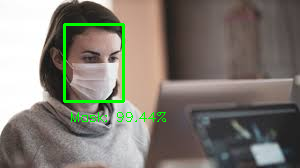

In [ ]:
img_path=os.path.join(PATH,'examples/example2.jpg')

# load the input image from disk, clone it, and grab the image spatial
# dimensions
image = cv2.imread(img_path)
orig = image.copy()
(h, w) = image.shape[:2]
# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
net.setInput(blob)
detections = net.forward()

# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with
	# the detection
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > 0.6:
        
    # compute the (x, y)-coordinates of the bounding box for
		# the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")  
		
    # ensure the bounding boxes fall within the dimensions of
		# the frame
		(startX, startY) = (max(0, startX), max(0, startY))
		(endX, endY) = (min(w - 1, endX), min(h - 1, endY))  
  	
    # extract the face ROI, convert it from BGR to RGB channel
		# ordering, resize it to 128x128, and preprocess it
		face = image[startY:endY, startX:endX]
		face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
		face = cv2.resize(face, (128, 128))
		face = img_to_array(face)
		face = preprocess_input(face)
		face = np.expand_dims(face, axis=0)      
		
    # pass the face through the model to determine if the face
		# has a mask or not 
      
		(without_Mask,with_Mask) = model.predict(face)[0]
    
    # determine the class label and color we'll use to draw
		# the bounding box and text
		label = "Mask" if with_Mask > without_Mask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)  
		
    # include the probability in the label
		label = "{}: {:.2f}%".format(label, max(with_Mask, without_Mask) * 100)
		
    # display the label and bounding box rectangle on the output
		# frame
		cv2.putText(image, label, (startX + 5, endY + 20),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 1)
		cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
  

# show the output image
print("[INFO] Result:")
cv2_imshow(image)

#im_path=PATH+'/predict.png'
#cv2.imwrite(im_path,image)